In [1]:
#load all pickle files from /runs folder

import pickle
import os
import numpy as np
import imageio

#load all pickle files from /runs folder
def load_all_pickle_files(path):
    #get all pickle files from /runs folder
    pickle_files = []
    for file in os.listdir('/home/peter/LearningJointLimits/HRI_scenario/'+str(path)):
        if file.endswith('.pkl'):
            pickle_files.append(file)
    #load all pickle files
    #sort by file name
    pickle_files.sort(key = lambda x:x[-5])
    print(pickle_files)
    data = []
    for file in pickle_files:
        with open('/home/peter/LearningJointLimits/HRI_scenario/'+ str(path) + file, 'rb') as f:
            data.append(pickle.load(f))
    return data


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scienceplots
plt.style.use(['science'])
plt.rcParams.update({'figure.dpi': '600'})

['results_1708909290.8464203.pkl', 'results_1708882379.763563.pkl', 'results_1708888026.2786694.pkl', 'results_1708916861.7338905.pkl', 'results_1708925587.5639186.pkl', 'results_1708896682.1743476.pkl', 'results_1708902684.5445096.pkl', 'results_1708891931.0898368.pkl', 'results_1708935294.4204638.pkl', 'results_1708884956.4844368.pkl']


/home/peter/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/peter/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/peter/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/peter/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWar

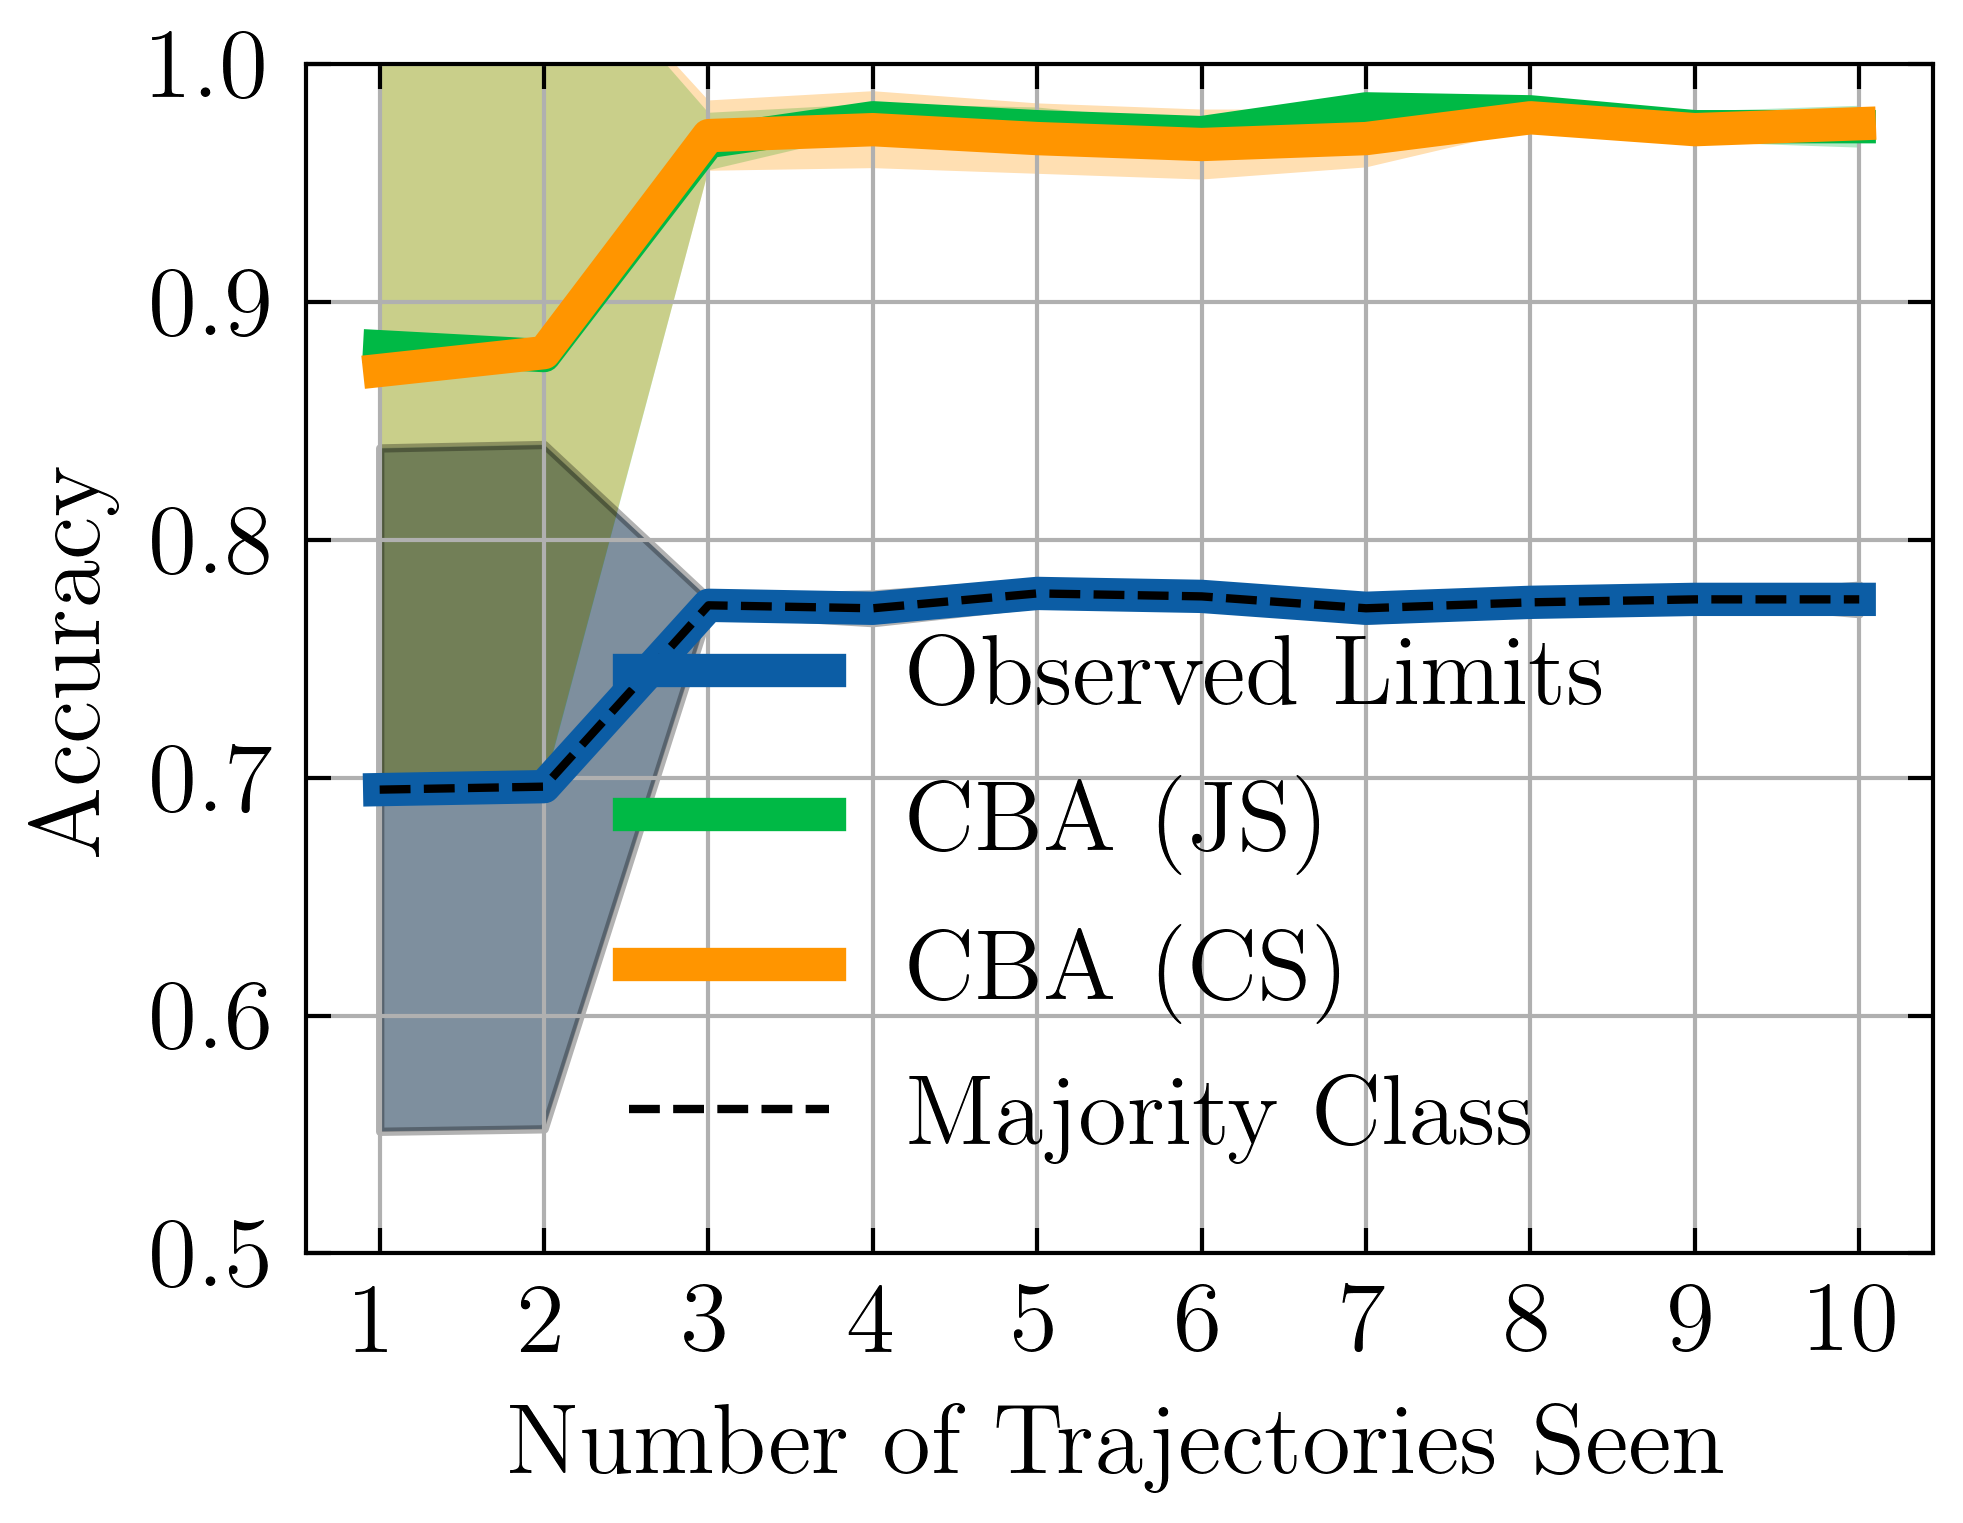

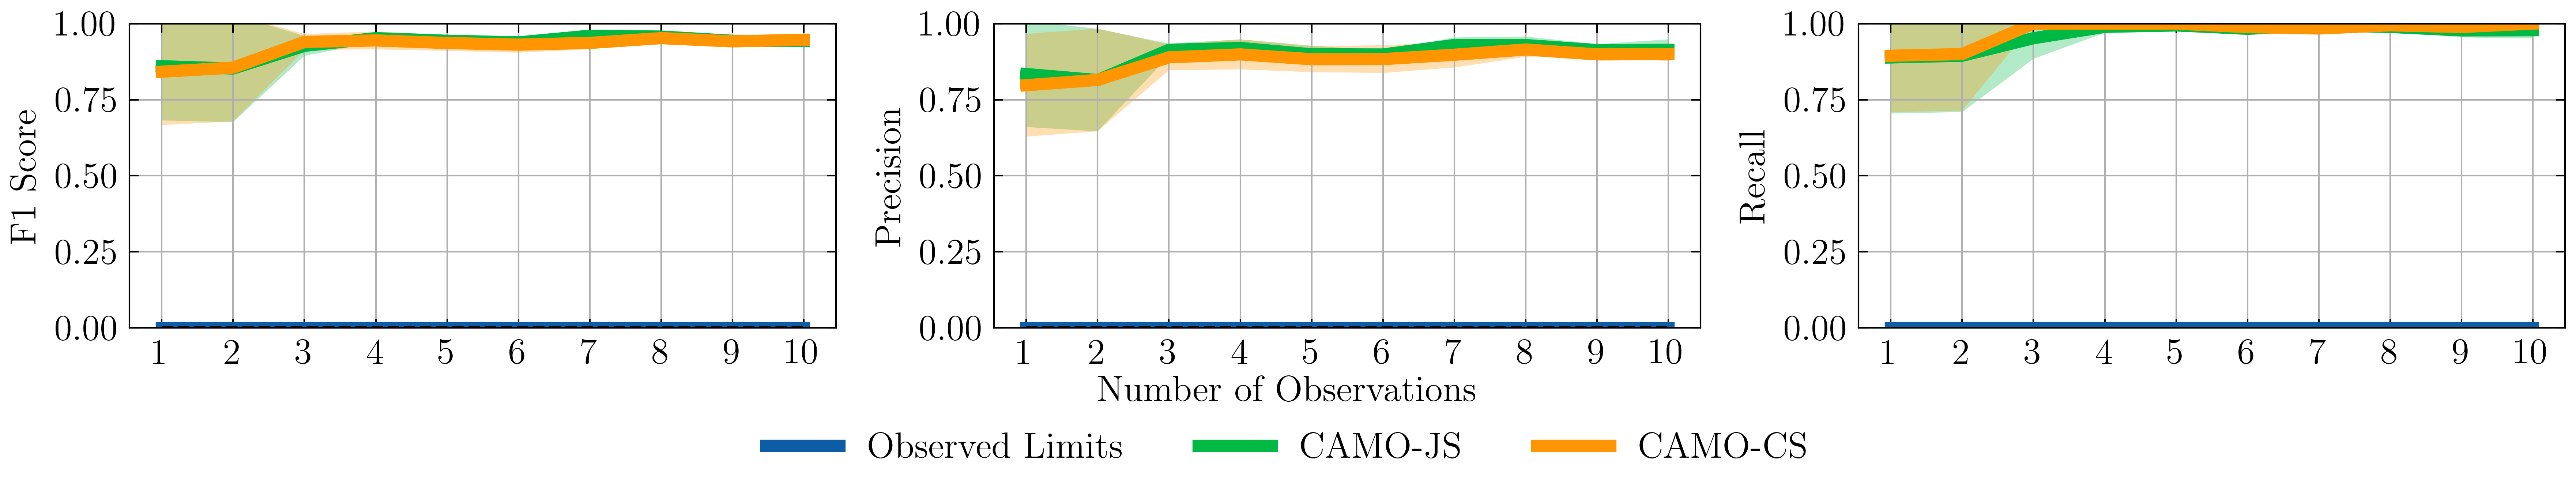

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
#load all pickle files
data = load_all_pickle_files('results/')

cms_est_all = []
cms_c_est_all = []
cms_naive_all = []
accs_est_all = []
accs_c_est_all = []
accs_naive_all = []
acc_always_robot_all = []
f2_est_all = []
f2_c_est_all = []
f2_naive_all = []
f2_always_robot_all = []
prec_est_all = []
prec_c_est_all = []
prec_naive_all = []
prec_always_robot_all = []
rec_est_all = []
rec_c_est_all = []
rec_c_naive_all = []
rec_always_robot_all = []

for run in data:
    cms_est = []
    cms_c_est = []
    cms_naive = []
    accs_est = []
    accs_c_est = []
    accs_naive = []
    acc_always_robot = []
    f2_est = []
    f2_c_est = []
    f2_naive = []
    f2_always_robot = []
    prec_est = []
    prec_c_est = []
    prec_naive = []
    prec_always_robot = []
    rec_est = []
    rec_c_est = []
    rec_c_naive = []
    rec_always_robot = []
    for update in run[3]:
        if update is not None:
            cms_est.append(confusion_matrix(update["labels"], update["est_labels"], labels=["Human", "Robot"]))
            cms_c_est.append(confusion_matrix(update["labels"], update["c_labels"], labels=["Human", "Robot"]))
            cms_naive.append(confusion_matrix(update["labels"], update["n_labels"], labels=["Human", "Robot"]))
            accs_est.append(accuracy_score(update["labels"], update["est_labels"], normalize=True))
            accs_c_est.append(accuracy_score(update["labels"], update["c_labels"], normalize=True))
            accs_naive.append(accuracy_score(update["labels"], update["n_labels"], normalize=True))
            acc_always_robot.append(accuracy_score(update["labels"], ["Robot"]*len(update["labels"]), normalize=True))
            f2_est.append(f1_score(update["labels"], update["est_labels"], labels=["Human", "Robot"], pos_label="Human"))
            f2_c_est.append(f1_score(update["labels"], update["c_labels"], labels=["Human", "Robot"], pos_label="Human"))
            f2_naive.append(f1_score(update["labels"], update["n_labels"], labels=["Human", "Robot"], pos_label="Human"))
            f2_always_robot.append(f1_score(update["labels"], ["Robot"]*len(update["labels"]), labels=["Human", "Robot"], pos_label="Human"))
            prec_est.append(precision_score(update["labels"], update["est_labels"], labels=["Human", "Robot"], pos_label="Human"))
            prec_c_est.append(precision_score(update["labels"], update["c_labels"], labels=["Human", "Robot"], pos_label="Human"))
            prec_naive.append(precision_score(update["labels"], update["n_labels"], labels=["Human", "Robot"], pos_label="Human"))
            prec_always_robot.append(precision_score(update["labels"], ["Robot"]*len(update["labels"]), labels=["Human", "Robot"], pos_label="Human"))
            rec_est.append(recall_score(update["labels"], update["est_labels"], labels=["Human", "Robot"], pos_label="Human"))
            rec_c_est.append(recall_score(update["labels"], update["c_labels"], labels=["Human", "Robot"], pos_label="Human"))
            rec_c_naive.append(recall_score(update["labels"], update["n_labels"], labels=["Human", "Robot"], pos_label="Human"))
            rec_always_robot.append(recall_score(update["labels"], ["Robot"]*len(update["labels"]), labels=["Human", "Robot"], pos_label="Human"))
        else:
            cms_est.append(0)
            cms_c_est.append(0)
            cms_naive.append(0)
            accs_est.append(0.)
            accs_c_est.append(0.)
            accs_naive.append(0.)
            acc_always_robot.append(0.)
            f2_est.append(0.)
            f2_c_est.append(0.)
            f2_naive.append(0.)
            f2_always_robot.append(0.)
            prec_est.append(0.)
            prec_c_est.append(0.)
            prec_naive.append(0.)
            prec_always_robot.append(0.)
            rec_est.append(0.)
            rec_c_est.append(0.)
            rec_c_naive.append(0.)
            rec_always_robot.append(0.)

    cms_est_all.append(cms_est)
    cms_c_est_all.append(cms_c_est)
    cms_naive_all.append(cms_naive)
    accs_est_all.append(accs_est)
    accs_c_est_all.append(accs_c_est)
    accs_naive_all.append(accs_naive)
    acc_always_robot_all.append(acc_always_robot)
    f2_est_all.append(f2_est)
    f2_c_est_all.append(f2_c_est)
    f2_naive_all.append(f2_naive)
    f2_always_robot_all.append(f2_always_robot)
    prec_est_all.append(prec_est)
    prec_c_est_all.append(prec_c_est)
    prec_naive_all.append(prec_naive)
    prec_always_robot_all.append(prec_always_robot)
    rec_est_all.append(rec_est)
    rec_c_est_all.append(rec_c_est)
    rec_c_naive_all.append(rec_c_naive)
    rec_always_robot_all.append(rec_always_robot)

#compute mean across all runs
accs_est = np.mean(np.array(accs_est_all), axis=0)
accs_c_est = np.mean(np.array(accs_c_est_all), axis=0)
accs_naive = np.mean(np.array(accs_naive_all), axis=0)
acc_always_robot = np.mean(np.array(acc_always_robot_all), axis=0)
f2_est = np.mean(np.array(f2_est_all), axis=0)
f2_c_est = np.mean(np.array(f2_c_est_all), axis=0)
f2_naive = np.mean(np.array(f2_naive_all), axis=0)
f2_always_robot = np.mean(np.array(f2_always_robot_all), axis=0)
prec_est = np.mean(np.array(prec_est_all), axis=0)
prec_c_est = np.mean(np.array(prec_c_est_all), axis=0)
prec_naive = np.mean(np.array(prec_naive_all), axis=0)
prec_always_robot = np.mean(np.array(prec_always_robot_all), axis=0)
rec_est = np.mean(np.array(rec_est_all), axis=0)
rec_c_est = np.mean(np.array(rec_c_est_all), axis=0)
rec_c_naive = np.mean(np.array(rec_c_naive_all), axis=0)
rec_always_robot = np.mean(np.array(rec_always_robot_all), axis=0)

# compute 95% CI
accs_est_std = np.std(np.array(accs_est_all), axis=0)
accs_est_upper = accs_est + 1.96 * accs_est_std/np.sqrt(len(accs_est_all))
accs_est_lower = accs_est - 1.96 * accs_est_std/np.sqrt(len(accs_est_all))
accs_c_est_std = np.std(np.array(accs_c_est_all), axis=0)
accs_c_est_upper = accs_c_est + 1.96 * accs_c_est_std/np.sqrt(len(accs_c_est_all))
accs_c_est_lower = accs_c_est - 1.96 * accs_c_est_std/np.sqrt(len(accs_c_est_all))
accs_naive_std = np.std(np.array(accs_naive_all), axis=0)
accs_naive_upper = accs_naive + 1.96 * accs_naive_std/np.sqrt(len(accs_naive_all))
accs_naive_lower = accs_naive - 1.96 * accs_naive_std/np.sqrt(len(accs_naive_all))
accs_always_robot_std = np.std(np.array(acc_always_robot_all), axis=0)
accs_always_robot_upper = acc_always_robot + 1.96 * accs_always_robot_std/np.sqrt(len(acc_always_robot_all))
accs_always_robot_lower = acc_always_robot - 1.96 * accs_always_robot_std/np.sqrt(len(acc_always_robot_all))
f2_est_std = np.std(np.array(f2_est_all), axis=0)
f2_est_upper = f2_est + 1.96 * f2_est_std/np.sqrt(len(f2_est_all))
f2_est_lower = f2_est - 1.96 * f2_est_std/np.sqrt(len(f2_est_all))
f2_c_est_std = np.std(np.array(f2_c_est_all), axis=0)
f2_c_est_upper = f2_c_est + 1.96 * f2_c_est_std/np.sqrt(len(f2_c_est_all))
f2_c_est_lower = f2_c_est - 1.96 * f2_c_est_std/np.sqrt(len(f2_c_est_all))
f2_naive_std = np.std(np.array(f2_naive_all), axis=0)
f2_naive_upper = f2_naive + 1.96 * f2_naive_std/np.sqrt(len(f2_naive_all))
f2_naive_lower = f2_naive - 1.96 * f2_naive_std/np.sqrt(len(f2_naive_all))
f2_always_robot_std = np.std(np.array(f2_always_robot_all), axis=0)
f2_always_robot_upper = f2_always_robot + 1.96 * f2_always_robot_std/np.sqrt(len(f2_always_robot_all))
f2_always_robot_lower = f2_always_robot - 1.96 * f2_always_robot_std/np.sqrt(len(f2_always_robot_all))
prec_est_std = np.std(np.array(prec_est_all), axis=0)
prec_est_upper = prec_est + 1.96 * prec_est_std/np.sqrt(len(prec_est_all))
prec_est_lower = prec_est - 1.96 * prec_est_std/np.sqrt(len(prec_est_all))
prec_c_est_std = np.std(np.array(prec_c_est_all), axis=0)
prec_c_est_upper = prec_c_est + 1.96 * prec_c_est_std/np.sqrt(len(prec_c_est_all))
prec_c_est_lower = prec_c_est - 1.96 * prec_c_est_std/np.sqrt(len(prec_c_est_all))
prec_naive_std = np.std(np.array(prec_naive_all), axis=0)
prec_naive_upper = prec_naive + 1.96 * prec_naive_std/np.sqrt(len(prec_naive_all))
prec_naive_lower = prec_naive - 1.96 * prec_naive_std/np.sqrt(len(prec_naive_all))
prec_always_robot_std = np.std(np.array(prec_always_robot_all), axis=0)
prec_always_robot_upper = prec_always_robot + 1.96 * prec_always_robot_std/np.sqrt(len(prec_always_robot_all))
prec_always_robot_lower = prec_always_robot - 1.96 * prec_always_robot_std/np.sqrt(len(prec_always_robot_all))
rec_est_std = np.std(np.array(rec_est_all), axis=0)
rec_est_upper = rec_est + 1.96 * rec_est_std/np.sqrt(len(rec_est_all))
rec_est_lower = rec_est - 1.96 * rec_est_std/np.sqrt(len(rec_est_all))
rec_c_est_std = np.std(np.array(rec_c_est_all), axis=0)
rec_c_est_upper = rec_c_est + 1.96 * rec_c_est_std/np.sqrt(len(rec_c_est_all))
rec_c_est_lower = rec_c_est - 1.96 * rec_c_est_std/np.sqrt(len(rec_c_est_all))
rec_c_naive_std = np.std(np.array(rec_c_naive_all), axis=0)
rec_c_naive_upper = rec_c_naive + 1.96 * rec_c_naive_std/np.sqrt(len(rec_c_naive_all))
rec_c_naive_lower = rec_c_naive - 1.96 * rec_c_naive_std/np.sqrt(len(rec_c_naive_all))
rec_always_robot_std = np.std(np.array(rec_always_robot_all), axis=0)
rec_always_robot_upper = rec_always_robot + 1.96 * rec_always_robot_std/np.sqrt(len(rec_always_robot_all))
rec_always_robot_lower = rec_always_robot - 1.96 * rec_always_robot_std/np.sqrt(len(rec_always_robot_all))


#plotting evolution of accuracy
x = np.arange(1,11,1)
plt.figure()
plt.plot(x, accs_naive, linewidth=4)
plt.plot(x, accs_est, linewidth=4)
plt.plot(x, accs_c_est, linewidth=4)
plt.plot(x, acc_always_robot, linestyle='dashed', color='black')
plt.fill_between(x, accs_naive_lower, accs_naive_upper, alpha=0.3)
plt.fill_between(x, accs_est_lower, accs_est_upper, alpha=0.3)
plt.fill_between(x, accs_c_est_lower, accs_c_est_upper, alpha=0.3)
plt.fill_between(x, accs_always_robot_lower, accs_always_robot_upper, alpha=0.3, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Number of Trajectories Seen')
plt.legend(["Observed Limits", "CBA (JS)", "CBA (CS)", "Majority Class"])
plt.ylim([0.5, 1])
plt.grid()
plt.minorticks_off()
plt.xticks(np.arange(1,11,1))

#make a 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(12, 2))
#bigger font size
plt.rc('font', size=12)
#shared x axis
fig.text(0.5, 0.02, 'Number of Observations', ha='center', fontsize=12)

#plot f2 score as subplot 1
axs[0].plot(x, f2_naive, linewidth=4)
axs[0].plot(x, f2_est, linewidth=4)
axs[0].plot(x, f2_c_est, linewidth=4)
axs[0].plot(x, f2_always_robot, linestyle='dashed', color='black')
axs[0].fill_between(x, f2_naive_lower, f2_naive_upper, alpha=0.3)
axs[0].fill_between(x, f2_est_lower, f2_est_upper, alpha=0.3)
axs[0].fill_between(x, f2_c_est_lower, f2_c_est_upper, alpha=0.3)
axs[0].fill_between(x, f2_always_robot_lower, f2_always_robot_upper, alpha=0.3, color='black')
axs[0].set_ylabel('F1 Score')
axs[0].set_ylim([0., 1])
axs[0].grid()
axs[0].minorticks_off()
axs[0].set_xticks(np.arange(1,11,1))

#plot precision
axs[1].plot(x, prec_naive, linewidth=4)
axs[1].plot(x, prec_est, linewidth=4)
axs[1].plot(x, prec_c_est, linewidth=4)
axs[1].plot(x, prec_always_robot, linestyle='dashed', color='black')
axs[1].fill_between(x, prec_naive_lower, prec_naive_upper, alpha=0.3)
axs[1].fill_between(x, prec_est_lower, prec_est_upper, alpha=0.3)
axs[1].fill_between(x, prec_c_est_lower, prec_c_est_upper, alpha=0.3)
axs[1].fill_between(x, prec_always_robot_lower, prec_always_robot_upper, alpha=0.3, color='black')
axs[1].set_ylabel('Precision')
axs[1].set_ylim([0., 1])
axs[1].grid()
axs[1].minorticks_off()
axs[1].set_xticks(np.arange(1,11,1))

#plot recall
axs[2].plot(x, rec_c_naive, linewidth=4)
axs[2].plot(x, rec_est, linewidth=4)
axs[2].plot(x, rec_c_est, linewidth=4)

axs[2].fill_between(x, rec_c_naive_lower, rec_c_naive_upper, alpha=0.3)
axs[2].fill_between(x, rec_est_lower, rec_est_upper, alpha=0.3)
axs[2].fill_between(x, rec_c_est_lower, rec_c_est_upper, alpha=0.3)

axs[2].set_ylabel('Recall')
axs[2].set_ylim([0., 1])
axs[2].grid()
axs[2].minorticks_off()
axs[2].set_xticks(np.arange(1,11,1))

#shared legend between all 3 plots
#put legend underneath x labels
fig.legend(["Observed Limits", "CAMO-JS", "CAMO-CS"], loc='lower center', bbox_to_anchor=(0.5,-0.2) , ncol=4)
fig.tight_layout()